In [24]:
from braincoder.models import GaussianPRF
from braincoder.optimize import WeightFitter
import pandas as pd
from neural_priors.utils.data import Subject
from braincoder.utils.stats import get_rsq

subject = '04'
bids_folder = '/data/ds-neuralpriors'

sub =Subject(subject, bids_folder=bids_folder)

masker = sub.get_brain_mask()

data = sub.get_single_trial_estimates(None)
data = masker.fit_transform(data)

behavior = sub.get_behavioral_data(None)

In [25]:
paradigm = behavior['n']

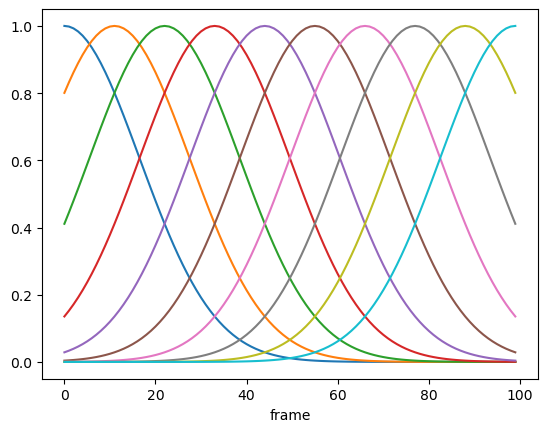

In [35]:
import numpy as np
mus = np.linspace(10, 40, 10)
sigmas = np.ones(10) * 5.
amplitudes = np.ones(10) * 1.
baselines = np.zeros(10)

parameters = pd.DataFrame({'mu': mus, 'sd': sigmas, 'amplitude': amplitudes, 'baseline': baselines})

model = GaussianPRF(parameters=parameters)

model.predict(np.linspace(10, 40, 100)).plot(legend=False)

fitter = WeightFitter(model, parameters, data, paradigm=paradigm)

weights = fitter.fit(.0000001)

pred = model.predict(paradigm, parameters, weights)

r2 = get_rsq(data, pred)

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_87781/803442394.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(r2)


<Axes: xlabel='r2', ylabel='Density'>

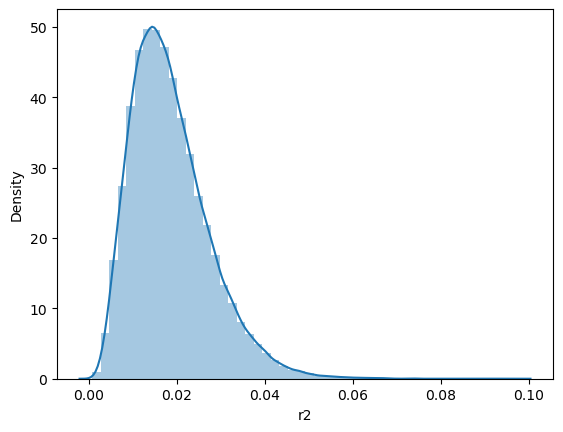

In [36]:
import seaborn as sns
sns.distplot(r2)

unit                             0         1         2         3      \
subject session run trial_nr                                           
04      1       1   1        -0.173063 -0.020421  0.427130  0.647857   
                    2         0.040258  0.246525  0.099563 -0.459998   
                    3        -0.113743  0.181440  0.241527  0.099961   
                    4         0.039765  0.244206  0.010425 -0.559507   
                    5        -0.113743  0.181440  0.241527  0.099961   
...                                ...       ...       ...       ...   
        2       8   26       -0.006963  0.266202  0.365022  0.003221   
                    27       -0.075775  0.122062  0.260190  0.077681   
                    28       -0.113743  0.181440  0.241527  0.099961   
                    29        0.047515  0.267497  0.217569 -0.294991   
                    30       -0.173063 -0.020421  0.427130  0.647857   

unit                             4         5         6         7      \
subject session run trial_nr                                           
04      1       1   1         0.050818  0.540215  0.748277  0.442015   
                    2         0.097795  0.248537 -0.356481 -0.259239   
                    3         0.070999  0.482883  0.188196  0.104730   
                    4         0.104992  0.040938 -0.672887 -0.294707   
                    5         0.070999  0.482883  0.188196  0.104730   
...                                ...       ...       ...       ...   
        2       8   26        0.040713  0.324412  0.164683 -0.042462   
                    27        0.015438  0.190700  0.470412  0.349261   
                    28        0.070999  0.482883  0.188196  0.104730   
                    29        0.087840  0.351286 -0.044876 -0.171008   
                    30        0.050818  0.540215  0.748277  0.442015   

unit                             8         9      ...     68165     68166  \
subject session run trial_nr                      ...                       
04      1       1   1         0.113262  0.272835  ...  0.060505  1.225201   
                    2        -0.105179  0.229940  ...  0.070363  0.297458   
                    3        -0.112107  0.138078  ... -0.011818  0.286057   
                    4        -0.141410  0.294092  ...  0.178000  0.094536   
                    5        -0.112107  0.138078  ... -0.011818  0.286057   
...                                ...       ...  ...       ...       ...   
        2       8   26       -0.022248  0.057370  ... -0.131162  0.442519   
                    27       -0.044205  0.208135  ...  0.016582  0.945396   
                    28       -0.112107  0.138078  ... -0.011818  0.286057   
                    29       -0.061004  0.156571  ... -0.037822  0.470224   
                    30        0.113262  0.272835  ...  0.060505  1.225201   

unit                             68167     68168     68169     68170  \
subject session run trial_nr                                           
04      1       1   1         0.364043  1.196499  0.116995 -1.455749   
                    2         0.681279  0.197597  0.630888 -1.391987   
                    3         0.293216  0.972433  0.072957 -0.769289   
                    4         0.774979  0.229236  0.744614 -0.987301   
                    5         0.293216  0.972433  0.072957 -0.769289   
...                                ...       ...       ...       ...   
        2       8   26       -0.008555  0.316843 -0.017937 -1.710616   
                    27        0.096904  0.677549 -0.045499 -1.308679   
                    28        0.293216  0.972433  0.072957 -0.769289   
                    29        0.435329  0.131779  0.421332 -1.733979   
                    30        0.364043  1.196499  0.116995 -1.455749   

unit                             68171     68172     68173     68174  
subject session run trial_nr                                          
04      1       1   1        -0.359296 -0.583

In [ ]:
fitter.p

In [ ]:
fitter.

In [13]:
data